# Data cleaning project




## Table of Contents
- [Introduction](#intro)
- [Part I: Research Question](#research)
- [Part II: Data-Cleaning Plan](#datacleaning_Plan)
- [Part III: Data Cleaning](#datacleaning)
- [Part IV. Supporting Documents](#sup_document)


<a id='intro'></a>
### Introduction
This project will focus on cleaning a raw medical file to prepare for the data analysis. The raw data file includes records of 10000 customers with 50 different columns. 

Libraries will be use for this project: Pandas, numpy, matplotlib and seaborn.


In [3]:
#import libraries
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA


<a id='research'></a>
### Part I: Research question: 

#### A. Question:  
What are some factors that could impact the readmission rate to hospitals? 

#### B.  Variables in the data set:



List of variables and their datatype:

In [4]:
# Import data
pd.set_option('display.max_rows', 500)
medical_data = pd.read_csv('medical_raw_data.csv')
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            7412 non-null   float64
 16  Age  

Additionally, Item1 - 8 variables represent responses to an eight-question survey asking customers
to rate the importance of various factors/surfaces on a scale of 1 to 8 (1 = most important,
8 = least important)

- Item1: Timely admission
- Item2: Timely treatment
- Item3: Timely visits
- Item4: Reliability
- Item5: Options
- Item6: Hours of treatment
- Item7: Courteous staff
- Item8: Evidence of active listening from doctor

<a id='datacleaning_Plan'></a>
### Part II: Data-Cleaning Plan
#### C. Data-cleaning explaination:
##### 1. Planning and steps: 
Assess data to look for quality issues such as missing values, outliers, bad format, etc., and tidiness issues. For each data issue found, there will be three steps: Define the issue, code to fix the issue, and test the result. Once testing is completed, a cleaned data set will be exported to a CSV file. 

##### 2. Approach:
- I started with the python info() function to get a first look at the summary of the data frame.  This is medical data with 10000 records and 52 variables. It looks like data has quite an amount of missing data and unclear columns' names. 
- In order to have a better understanding of the data set and check for its quality, I will assess for Null values, duplicates, data types issues. After that, I will inspect data visually to look at trends and outliers. 

##### 3. Tools:
The programing language that will be used is Python with libraries: Pandas, NumPy, matplotlib, and seaborn. Pandas, NumPy are great tools for fast cleaning and preparation of data for further analysis, while Matplotlib and seaborn will be used for creating plot charts and attractive visualization.

##### 4. Code for assesing data: 





In [5]:
#get 10 samples from medical_data
medical_data.sample(10)



,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
4589,4590,4590,T478700,96d06c42-a20c-45c4-835d-61a7f3afe300,41470a3ecf54b7bf0f60ddbb20be3d50,Deer Lodge,MT,Powell,59722,46.36252,-112.76562,5737,Urban,America/Denver,Fine artist,1.0,NaN,Bachelor's Degree,Student,42011.89,Never Married,Female,No,17.643058,4,0,2,Yes,Emergency Admission,No,No,Medium,1.0,No,Yes,No,Yes,0.0,No,Yes,No,CT Scan,2.339656,2330.069002,10436.373990,3,3,4,2,5,3,3,2
1136,1137,1137,Y590433,281c7d17-1072-4d03-9c4c-ca18b0ec7006,2e73138fbea8196f1918a72965dc40d0,Montgomery,AL,Montgomery,36106,32.35250,-86.25758,15094,Urban,America/Chicago,Ranger/warden,1.0,62.0,Associate's Degree,Full Time,51236.62,Never Married,Male,No,19.196849,5,1,0,NaN,Elective Admission,No,No,Medium,1.0,No,No,No,Yes,1.0,No,Yes,Yes,Blood Work,3.090844,2277.390389,10360.934300,3,4,4,4,3,5,3,2
7674,7675,7675,Y413649,d38f64dd-6fba-4be4-9f45-39de10d0e27e,1830c7803dac7c8673a6ef69f08c7a04,Monticello,AR,Drew,71655,33.63088,-91.74650,15192,Rural,America/Chicago,Health visitor,2.0,58.0,"9th Grade to 12th Grade, No Diploma",Full Time,NaN,Divorced,Female,No,16.535973,5,1,0,NaN,Observation Admission,Yes,No,High,1.0,No,No,Yes,No,0.0,Yes,No,No,Blood Work,NaN,5875.754425,19413.826880,3,3,2,5,3,4,2,4
6889,6890,6890,U42823,e20de3c3-cad7-487c-a3b5-30074e2859ff,9c3c297338c83c36fa8a744c2a8cca13,Plainville,KS,Rooks,67663,39.21143,-99.34919,2695,Rural,America/Chicago,Chief Financial Officer,0.0,42.0,"Some College, 1 or More Years, No Degree",Retired,17729.85,Separated,Female,Yes,20.107425,4,0,0,NaN,Elective Admission,Yes,No,High,1.0,No,No,No,No,0.0,No,Yes,No,Blood Work,NaN,7730.976225,14228.076740,4,3,3,5,3,4,4,3
1669,1670,1670,X815566,dd9153f8-7edd-435c-9c24-efab388ef63d,6fc51ac7670b416deae62cfe9dda6169,Thurston,OH,Fairfield,43157,39.84265,-82.54613,648,Rural,America/New_York,Graphic designer,1.0,NaN,"9th Grade to 12th Grade, No Diploma",Retired,4620.60,Divorced,Male,No,16.916157,5,0,0,No,Emergency Admission,No,No,Medium,0.0,No,No,No,No,1.0,No,No,Yes,Blood Work,1.181869,2559.359721,9971.523103,4,4,4,5,3,4,3,3
9130,9131,9131,U09685,b75f3360-bded-4de8-a160-e4623c93a787,47209aaae1e07abdd28add0d635b76ec,Missouri City,TX,Fort Bend,77459,29.52569,-95.53300,69546,Suburban,America/Chicago,"Lighting technician, broadcasting/film/video",9.0,55.0,Regular High School Diploma,Unemployed,19293.07,Widowed,Female,Yes,19.412129,5,1,2,No,Emergency Admission,No,No,High,0.0,No,No,No,No,NaN,Yes,Yes,Yes,Intravenous,NaN,8733.798647,10217.858470,4,4,3,5,2,4,5,4
8114,8115,8115,C491895,eb66a283-107d-43a2-9aa8-b9751039a2b6,ba2470e18de55deb17657d0f1df90ed7,Miami,FL,Miami-Dade,33182,25.78370,-80.43398,17379,Suburban,America/New_York,Film/video editor,4.0,76.0,Regular High School Diploma,Full Time,16099.40,Widowed,Male,Yes,17.875132,6,0,0,No,Elective Admission,Yes,No,Low,1.0,No,No,No,No,0.0,No,Yes,No,Intravenous,57.508856,6871.762091,24780.000930,4,3,4,4,4,3,4,4
8882,8883,8883,N279251,4dc44b9e-4260-4d94-a57a-fa4412fdd09b,1c58c5c1fa2676bd639da6e7ab38f8ba,Helena,AL,Shelby,35080,33.25974,-86.91282,17889,Rural,America/Chicago,Public affairs consultant,4.0,61.0,Regular High School Diploma,Full Time,37151.21,Never Married,Male,Yes,22.632569,5,1,0,No,Elective Admission,Yes,No,High,1.0,No,No,No,No,0.0,Yes,Yes,No,Blood Work,66.315380,8450.370728,20518.466130,3,4,4,4,4,4,4,3
792,793,793,K232537,d7b8a07c-0ce0-427f-8e22-389644cb247c,1e4a70e4f33600f4eaf403fcc74b6e29,Almo,ID,Cassia,83312,41.97585,-113.65429,154,Rural,America/Denver,Outdoor activities/education manager,NaN,69.0,"9th Grade to 12th Grade, No Diploma",Full Time,6

In [6]:
#checing for duplicated 
sum(medical_data.duplicated())

0

In [7]:
# Check medical_data statistic
medical_data.describe()


,Unnamed: 0,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Overweight,Anxiety,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,7412.000000,7586.000000,7536.000000,10000.000000,10000.000000,10000.000000,10000.000000,9018.000000,9016.000000,8944.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.098219,53.295676,40484.438268,19.412675,5.012200,1.001400,0.398900,0.709137,0.322316,34.432082,5891.538261,12934.528586,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.155427,20.659182,28664.861050,6.723277,1.045734,1.008117,0.628505,0.454186,0.467389,26.287050,3377.558136,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,1.00000,610.000000,17.967190,-174.209690,0.000000,0.000000,18.000000,154.080000,9.519012,1.000000,0.000000,0.000000,0.000000,0.000000,1.001981,1256.751699,3125.702716,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,35.000000,19450.792500,16.513171,4.000000,0.000000,0.000000,0.000000,0.000000,7.911709,3253.239465,7986.487642,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33942.280000,18.080560,5.000000,1.000000,0.000000,1.000000,0.000000,34.446941,5852.250564,11573.979365,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54075.235000,19.789740,6.000000,2.000000,1.000000,1.000000,1.000000,61.124654,7614.989701,15626.491033,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.130000,53.019124,9.000000,7.000000,5.000000,1.000000,1.000000,71.981486,21524.224210,30566.073130,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [8]:
# check for missing data 
medical_data.isnull().sum()

Unnamed: 0               0
CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
A

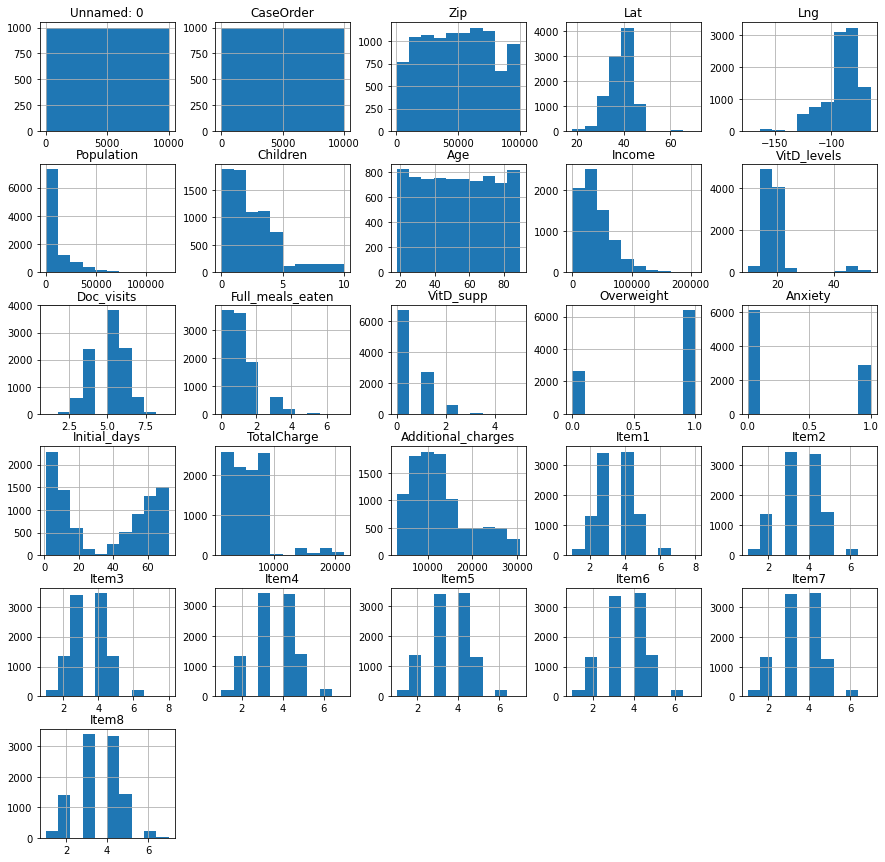

In [9]:
# Data inspected in visual
medical_data.hist(figsize=(15,15));

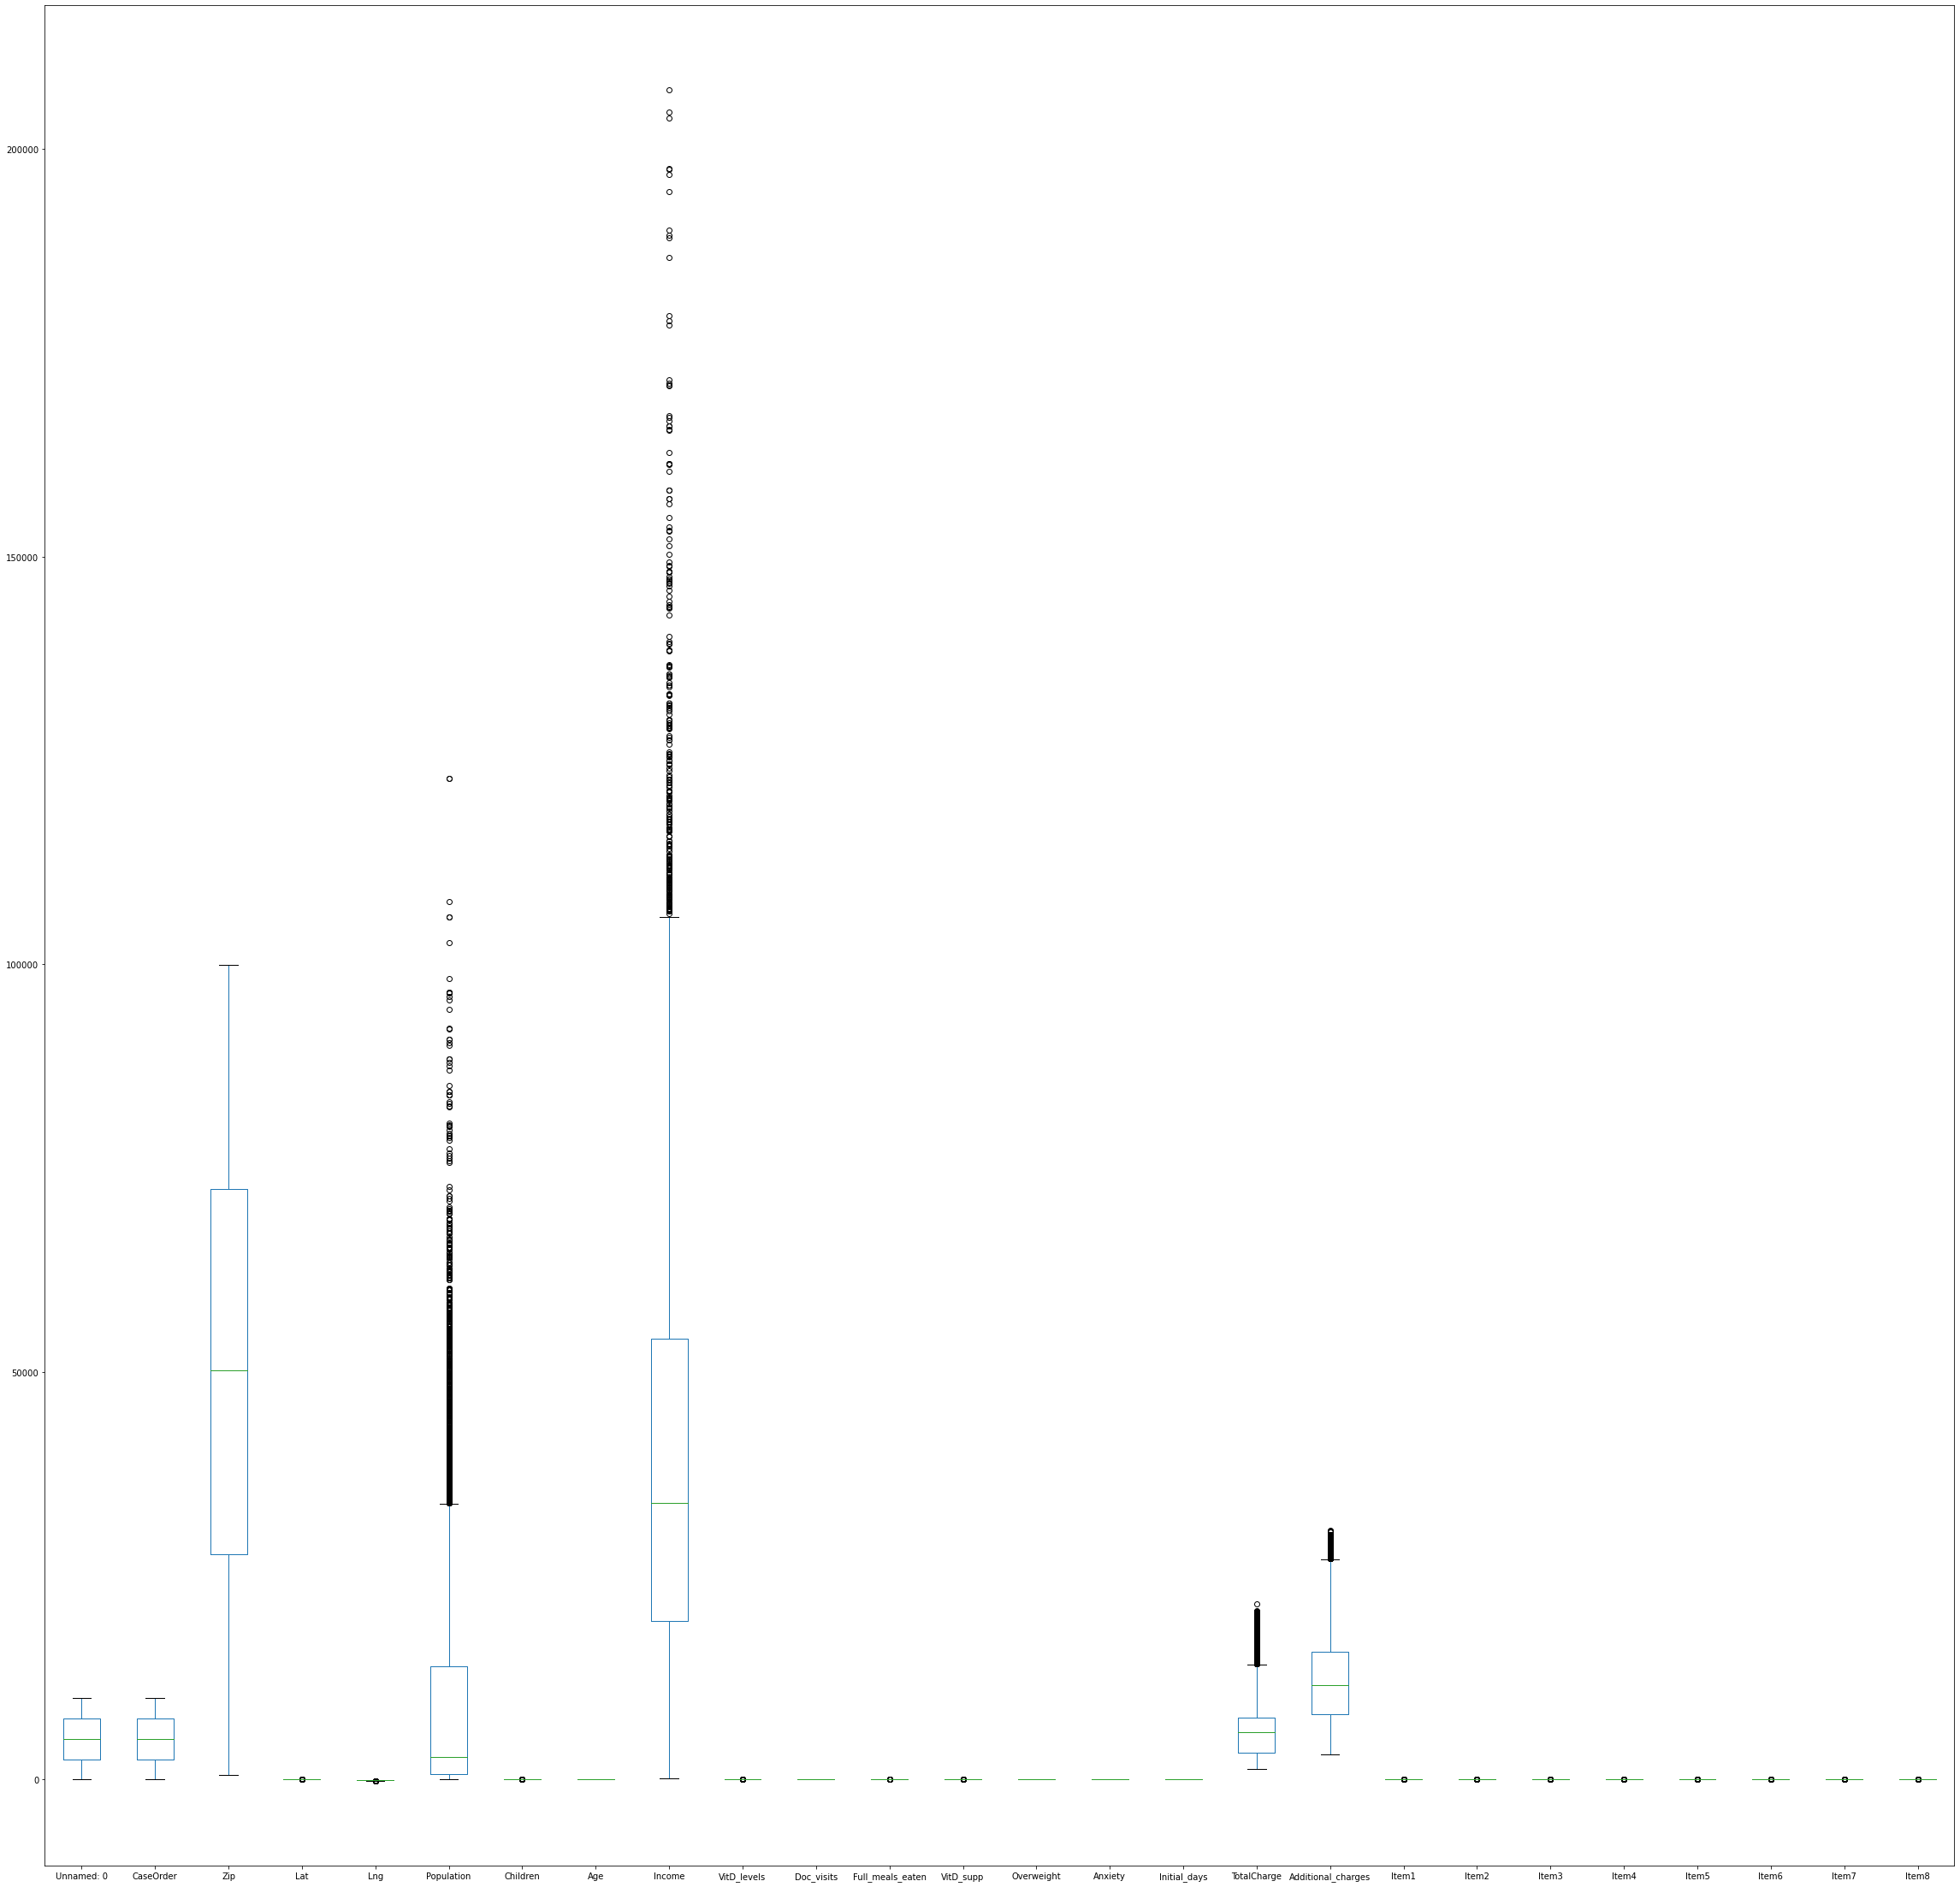

In [10]:
medical_data.plot.box(figsize=(40,40));

count     10000.000000
mean       9965.253800
std       14824.758614
min           0.000000
25%         694.750000
50%        2769.000000
75%       13945.000000
max      122814.000000
Name: Population, dtype: float64

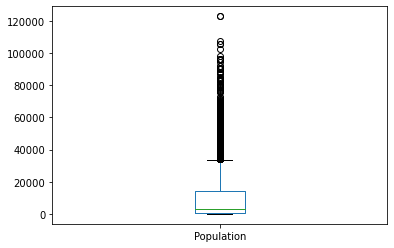

In [11]:
Population = medical_data['Population']
Population.plot.box()
Population.describe()

count    7412.000000
mean        2.098219
std         2.155427
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        10.000000
Name: Children, dtype: float64

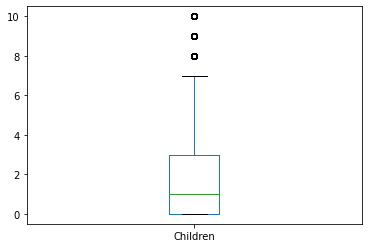

In [12]:
Children = medical_data['Children']
Children.plot.box()
Children.describe()

count    7586.000000
mean       53.295676
std        20.659182
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: Age, dtype: float64

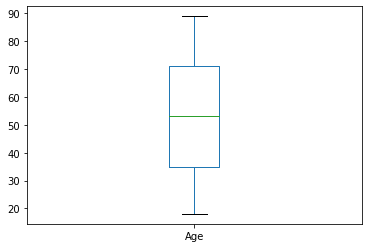

In [13]:
Age = medical_data['Age']
Age.plot.box()
Age.describe()

count      7536.000000
mean      40484.438268
std       28664.861050
min         154.080000
25%       19450.792500
50%       33942.280000
75%       54075.235000
max      207249.130000
Name: Income, dtype: float64

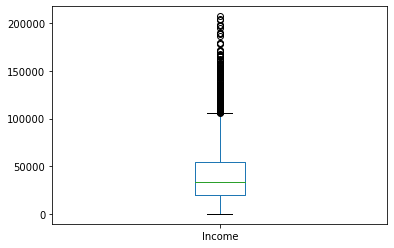

In [14]:
Income = medical_data['Income']
Income.plot.box()
Income.describe()

count    10000.000000
mean        19.412675
std          6.723277
min          9.519012
25%         16.513171
50%         18.080560
75%         19.789740
max         53.019124
Name: VitD_levels, dtype: float64

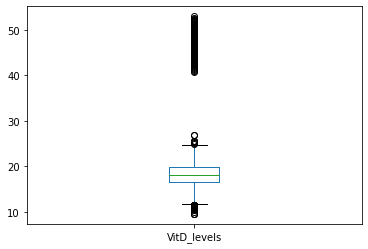

In [15]:
VitaminD = medical_data['VitD_levels']
VitaminD.plot.box()
VitaminD.describe()

count    10000.000000
mean      5891.538261
std       3377.558136
min       1256.751699
25%       3253.239465
50%       5852.250564
75%       7614.989701
max      21524.224210
Name: TotalCharge, dtype: float64

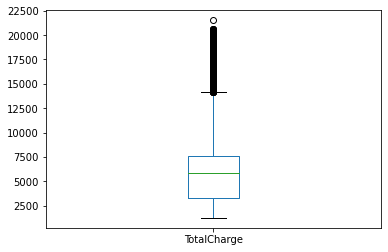

In [16]:
TotalCharge = medical_data['TotalCharge']
TotalCharge.plot.box()
TotalCharge.describe()

count    10000.000000
mean     12934.528586
std       6542.601544
min       3125.702716
25%       7986.487642
50%      11573.979365
75%      15626.491033
max      30566.073130
Name: Additional_charges, dtype: float64

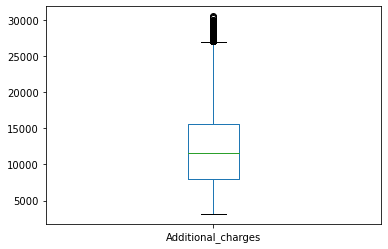

In [17]:
Additional_charges = medical_data['Additional_charges']
Additional_charges.plot.box()
Additional_charges.describe()

<a id='datacleaning'></a>
### Part III: Data Cleaning 

  #### D1. List of Issues found:
    1. Redundant column: column unnamed and CaseOrder is duplicate
    2. Columns with unclear name like item1, item2...
    3. Missing values on columns: Children, Age, Income, Soft_drink, Overweight, Anxiety, Initial_days
    4. Data type issues: 
          - Zipcode should be object instead of interger
          - Children and age shouldn interger instead of float
          - Overweight and Anxiety should be object instead of float
    5. Outliner on collumns : population, children, Income, VitaminD, totalcharge, additional_changes  

 ##### Define issue 1:
- Redundant column: column unnamed and CaseOrder is duplicate
- Delete duplicate and unused columns for this project: Unnamed, Interaction, UID, Lat, Lng|

 ##### Code


In [18]:
medical_data = medical_data.drop(columns=["Unnamed: 0", "Interaction", "UID", "Lat", "Lng"])

 ##### Test


In [19]:
medical_data.sample(10)


,CaseOrder,Customer_id,City,State,County,Zip,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
3840,3841,D703928,Palmetto,GA,Fulton,30268,10434,Suburban,America/New_York,Quality manager,10.0,64.0,Bachelor's Degree,Full Time,8350.05,Divorced,Male,No,22.880204,4,2,1,No,Emergency Admission,Yes,Yes,Low,1.0,No,Yes,No,Yes,0.0,No,Yes,No,Intravenous,13.025973,3685.478722,22232.962140,3,4,4,2,6,4,2,2
3597,3598,N803977,Pollocksville,NC,Jones,28573,2053,Urban,America/New_York,"Scientist, research (medical)",NaN,18.0,Regular High School Diploma,Full Time,83690.64,Divorced,Male,No,16.622959,4,1,0,No,Emergency Admission,Yes,No,High,NaN,No,No,No,Yes,0.0,No,No,No,Blood Work,15.493745,3865.429116,7037.585840,6,5,5,5,3,4,4,5
9376,9377,G661566,Aurora,CO,Adams,80045,889,Rural,America/Denver,Art therapist,NaN,NaN,"Some College, 1 or More Years, No Degree",Full Time,NaN,Separated,Male,Yes,20.425245,4,0,0,NaN,Elective Admission,No,No,Medium,1.0,Yes,No,No,Yes,0.0,Yes,Yes,No,Blood Work,61.379582,7322.270225,8013.787149,4,4,4,4,3,4,3,4
3892,3893,R26383,Luquillo,PR,Luquillo,773,18547,Rural,America/Puerto_Rico,"Engineer, petroleum",NaN,NaN,Nursery School to 8th Grade,Full Time,19216.97,Separated,Female,No,19.475537,5,1,0,NaN,Elective Admission,Yes,No,Low,0.0,Yes,No,Yes,No,0.0,No,No,Yes,Blood Work,18.630005,3424.539699,14646.475940,4,3,3,3,3,3,4,2
7737,7738,I900484,Foster,VA,Mathews,23056,471,Suburban,America/New_York,Holiday representative,NaN,NaN,Regular High School Diploma,Full Time,NaN,Separated,Female,No,19.918405,4,1,0,No,Elective Admission,Yes,No,Low,1.0,No,No,Yes,Yes,1.0,No,No,No,Intravenous,52.723520,6749.045872,26206.667410,3,2,3,4,2,3,2,4
2118,2119,M563356,Denton,NC,Davidson,27239,9066,Rural,America/New_York,Chartered legal executive (England and Wales),3.0,68.0,Regular High School Diploma,Full Time,14039.16,Married,Male,No,19.671250,5,1,0,No,Emergency Admission,No,No,Low,1.0,Yes,No,No,Yes,0.0,Yes,Yes,Yes,Blood Work,6.059876,3182.097390,11667.163310,3,5,4,1,4,4,2,5
6113,6114,I148709,Boca Grande,FL,Lee,33921,861,Suburban,America/New_York,Energy engineer,0.0,88.0,GED or Alternative Credential,Full Time,8809.55,Separated,Female,Yes,17.651904,5,0,0,Yes,Elective Admission,No,No,Medium,1.0,No,No,Yes,No,1.0,No,No,No,Blood Work,61.796807,6692.222041,14422.972230,3,3,4,2,3,4,5,5
4701,4702,Q671220,Wallagrass,ME,Aroostook,4781,568,Suburban,America/New_York,"Psychologist, clinical",NaN,30.0,Bachelor's Degree,Full Time,NaN,Married,Male,No,17.657703,5,1,1,No,Observation Admission,No,No,Medium,0.0,No,No,Yes,No,0.0,Yes,Yes,No,Intravenous,12.791560,2635.001812,5188.275793,4,2,3,3,2,3,3,5
248,249,F210779,Oklahoma City,OK,Oklahoma,73102,4996,Urban,America/Chicago,Cartographer,NaN,44.0,Associate's Degree,Full Time,108278.74,Divorced,Male,No,14.704421,5,0,1,No,Elective Admission,Yes,No,Medium,1.0,Yes,Yes,No,Yes,0.0,No,Yes,No,Intravenous,8.658415,2327.365348,14855.771490,5,4,5,4,1,6,5,7
4733,4734,D754104,Pine Level,NC,Johnston,27568,596,Urban,America/New_York,"Psychologist, educational",NaN,61.0,Associate's Degree,Student,85634.18,Separated,Female,No,15.316319,6,3,0,No,Emergency Admission,No,No,High,0.0,Yes,No,Yes,Yes,1.0,No,No,No,CT Scan,3.421723,3015.152739,11126.333000,5,3,4,2,4,3,3,4


 ##### Define issue 2:
Changing Columns with unclear name like item1, item2... to more descriptive name 


 ##### Code:


In [20]:
#rename columns Item1, Item2, Item3, Item4, Item5, Item6,Item7, Item8
medical_data.rename(columns={"Item1": "Survey_timely_addmission",
                   "Item2": "Survey_timely_treatment", 
                   "Item3": "Survey_timely_visits", 
                   "Item4": "Survey_reliability", 
                   "Item5": "Survey_options", 
                   "Item6": "Survey_hours_of_treatments", 
                   "Item7": "Survey_courteous_staff", 
                   "Item8": "Survey_active_listening_from_doctor"}, inplace=True)


 ##### Test


In [21]:
medical_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 48 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CaseOrder                            10000 non-null  int64  
 1   Customer_id                          10000 non-null  object 
 2   City                                 10000 non-null  object 
 3   State                                10000 non-null  object 
 4   County                               10000 non-null  object 
 5   Zip                                  10000 non-null  int64  
 6   Population                           10000 non-null  int64  
 7   Area                                 10000 non-null  object 
 8   Timezone                             10000 non-null  object 
 9   Job                                  10000 non-null  object 
 10  Children                             7412 non-null   float64
 11  Age                          

 ##### Define issue 3:
Fill missing data with the mean and mode

 ##### Code:


In [22]:
#Fill missing numerical data with the median
medical_data[['Children', 'Age', 'Income', 'Overweight', 'Anxiety', 'Initial_days']]=medical_data[['Children', 'Age', 'Income', 'Overweight', 'Anxiety', 'Initial_days']].fillna(medical_data.median())
#fill missing categorical data with the mode 
medical_data['Soft_drink'] = medical_data['Soft_drink'].fillna(medical_data['Soft_drink'].mode()[0])

 ##### Test:


In [23]:
medical_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 48 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CaseOrder                            10000 non-null  int64  
 1   Customer_id                          10000 non-null  object 
 2   City                                 10000 non-null  object 
 3   State                                10000 non-null  object 
 4   County                               10000 non-null  object 
 5   Zip                                  10000 non-null  int64  
 6   Population                           10000 non-null  int64  
 7   Area                                 10000 non-null  object 
 8   Timezone                             10000 non-null  object 
 9   Job                                  10000 non-null  object 
 10  Children                             10000 non-null  float64
 11  Age                          

 ##### Define issue 4:
 Converting Data Types


 ##### Code:


In [24]:
medical_data[['Overweight', 'Anxiety','Zip']] = medical_data[['Overweight', 'Anxiety','Zip']].astype(object)
medical_data[['Children','Age']] = medical_data[['Children','Age']].astype(int)

 ##### Test:


In [25]:
medical_data[['Children', 'Age','Zip', 'Overweight', 'Anxiety']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Children    10000 non-null  int32 
 1   Age         10000 non-null  int32 
 2   Zip         10000 non-null  object
 3   Overweight  10000 non-null  object
 4   Anxiety     10000 non-null  object
dtypes: int32(2), object(3)
memory usage: 312.6+ KB


 ##### Define issue 5:

Define outliers

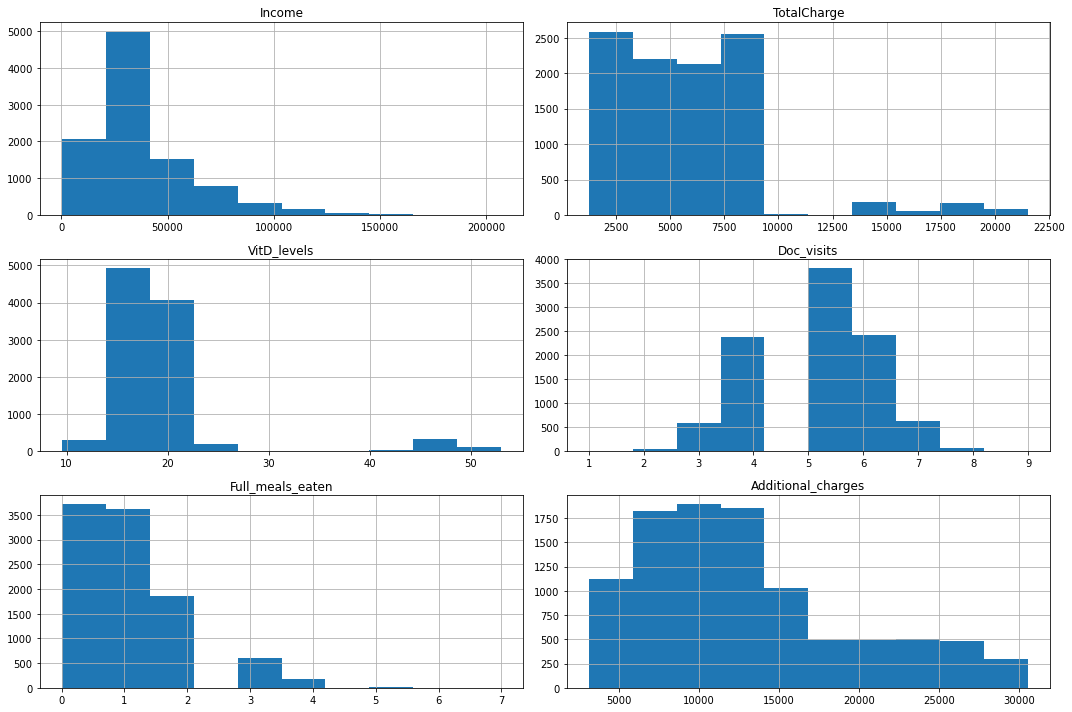

In [26]:
plots = medical_data[['Income', 'TotalCharge','VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'Additional_charges']].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

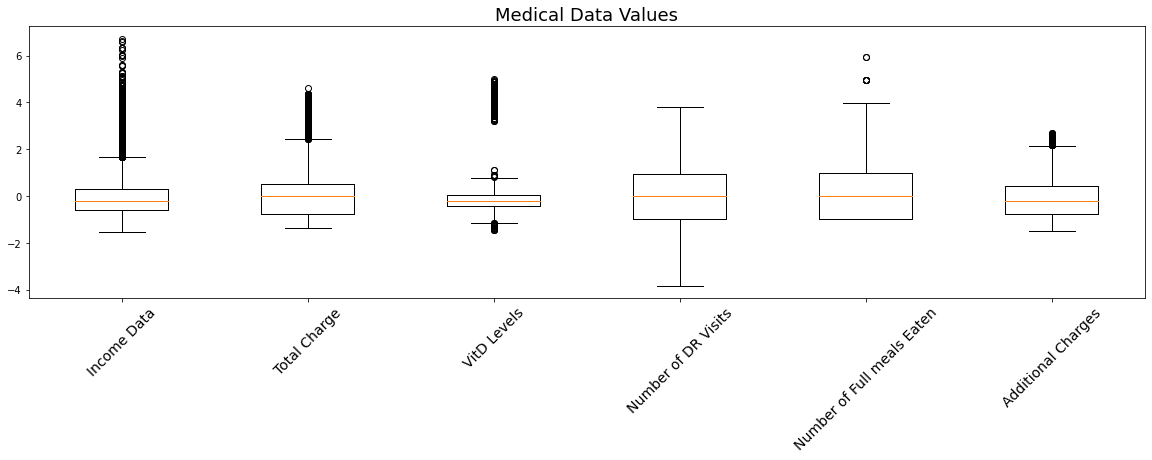

In [27]:
std_income_data = (medical_data["Income"] - medical_data["Income"].mean()) /medical_data["Income"].std()
std_total_charge = (medical_data["TotalCharge"] - medical_data["TotalCharge"].mean()) /medical_data["TotalCharge"].std()
std_vitd_data = (medical_data["VitD_levels"] - medical_data["VitD_levels"].mean()) /medical_data["VitD_levels"].std()
std_docvisit_data = (medical_data["Doc_visits"] - medical_data["Doc_visits"].mean()) /medical_data["Doc_visits"].std()
std_Full_meals_eaten = (medical_data["Full_meals_eaten"] - medical_data["Full_meals_eaten"].mean()) /medical_data["Full_meals_eaten"].std()
std_Additional_charges = (medical_data["Additional_charges"] - medical_data["Additional_charges"].mean()) /medical_data["Additional_charges"].std()

plt.figure(figsize=(20,5)) 
plt.title("Medical Data Values", size=18)
plt.boxplot([
    std_income_data,
    std_total_charge,
    std_vitd_data,
    std_docvisit_data,
    std_Full_meals_eaten,
    std_Additional_charges
]) 
plt.xticks(
    [1,2,3,4,5, 6],
    [
    "Income Data",
    "Total Charge",
    "VitD Levels",
    "Number of DR Visits",
    "Number of Full meals Eaten",
    "Additional Charges"
    ],
    rotation=45,
    size=14
           
)
plt.show()



In [28]:
#export file to csv
medical_data.to_csv('medical_data_clean.csv', index = False)

In [29]:
# Sample 10 records of cleaned data
medical_data.sample(5)


,CaseOrder,Customer_id,City,State,County,Zip,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Survey_timely_addmission,Survey_timely_treatment,Survey_timely_visits,Survey_reliability,Survey_options,Survey_hours_of_treatments,Survey_courteous_staff,Survey_active_listening_from_doctor
2222,2223,S575796,Gowanda,NY,Erie,14070,6847,Urban,America/New_York,Tax adviser,1,53,Professional School Degree,Full Time,33942.28,Separated,Female,No,19.517570,3,1,0,Yes,Observation Admission,No,No,Low,0.0,Yes,Yes,No,Yes,0.0,No,No,No,Blood Work,34.446941,2269.642640,9897.115724,3,1,3,4,3,3,3,4
5755,5756,N440337,South Acworth,NH,Sullivan,3607,440,Suburban,America/New_York,Police officer,2,46,Associate's Degree,Full Time,103900.82,Separated,Female,Yes,18.451653,6,1,1,Yes,Emergency Admission,Yes,No,Medium,1.0,Yes,No,No,No,1.0,Yes,Yes,No,CT Scan,69.955420,8378.043079,15570.843490,3,3,3,3,4,2,3,4
2823,2824,P926082,Colorado Springs,CO,El Paso,80910,30196,Rural,America/Denver,Chiropractor,0,53,Regular High School Diploma,Unemployed,45393.19,Widowed,Male,No,17.237996,5,2,0,No,Observation Admission,No,No,Medium,1.0,No,No,Yes,No,0.0,Yes,No,No,Intravenous,7.699284,2412.784028,13381.190530,3,4,4,2,4,4,3,4
4962,4963,X510796,Leonia,NJ,Bergen,7605,9111,Rural,America/New_York,Horticultural therapist,1,79,Bachelor's Degree,Full Time,21537.55,Separated,Female,No,16.265360,3,1,0,No,Elective Admission,Yes,No,Medium,1.0,Yes,No,No,Yes,0.0,Yes,Yes,No,Blood Work,30.849272,4528.874797,25667.681380,4,3,3,3,3,4,5,3
4247,4248,X662828,New York,NY,New York,10014,30738,Rural,America/New_York,"Research officer, trade union",1,53,GED or Alternative Credential,Full Time,33942.28,Married,Female,No,17.356630,4,2,0,No,Emergency Admission,No,No,Medium,1.0,No,No,No,Yes,0.0,No,No,No,Blood Work,2.290284,2557.862657,14997.047630,4,3,2,4,3,4,3,2


#### D2: Justification of methods:

 1.Duplicate columns: Drop function was used to delete duplicate column drop unamed. Columns Interaction, UID, Lat, Lng also being droped because they are will not be used for this analysis project.

 2. Unclear name columns: I used rename() method to change all columns from Item1 to item8 to a more accurate name using each survey name. 

 3. Missing values found In columns Children, Age, Income, , Overweight, Anxiety, Initial_days. Missing values seem to be random. Since there are outliers in the data set, I decided to replace the missing value with the median, therefore it will not be affected by the outliers. 
I replaced missing values in Soft_drink column because it's not numerical data. 

 4. Data type issues: Astype() is used to change the datatype of Zipcode, Children, age, Overweight and Anxiety to a more appropriate datatype. 
   
 5. Outliner is identified in columns population, children, Income, VitaminD, totalcharge, additional_changes. Although outliers are defined, they seem to be in the abnormal range.
 
#### D3: Summary of the Outcomes:
Data set no long having Null and duplicate values. Data type and columns' names are now accurate.

#### D4: Mitigation Code: 
Please see code for each issue above

#### D5: Clean Data 
New exported CSV file name medical_data_clean is attached.

#### D6: Limitations 

Data variables limitation.  Some value variables suggested to be be included are primary diagnoses and reasons for readmission.

#### D7: Impact of the Limitations
The limitation in data variables could impact the result of the analysis. Without knowing the reason for readmission, the analysis will be limited in identifying trends of some health issues that are more than likely to cause readmission. 


 ### Principal component Analysis



In [30]:
# Define a new data set contain variables with Int and float data types
df = medical_data[['Population', 'Children', 'Age', 'Income','VitD_levels', 'Doc_visits','Full_meals_eaten', 'VitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges', 'Survey_timely_addmission', 'Survey_timely_treatment', 'Survey_timely_visits', 'Survey_reliability', 'Survey_options', 'Survey_hours_of_treatments', 'Survey_courteous_staff', 'Survey_active_listening_from_doctor']]


In [31]:
df.head ()

,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Initial_days,TotalCharge,Additional_charges,Survey_timely_addmission,Survey_timely_treatment,Survey_timely_visits,Survey_reliability,Survey_options,Survey_hours_of_treatments,Survey_courteous_staff,Survey_active_listening_from_doctor
0,2951,1,53,86575.93,17.802330,6,0,0,10.585770,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,11303,3,51,46805.99,18.994640,4,2,1,15.129562,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,17125,3,53,14370.14,17.415889,4,1,0,4.772177,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,2162,0,78,39741.49,17.420079,4,1,0,1.714879,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5287,1,22,1209.56,16.870524,5,0,2,1.254807,1885.655137,3716.525786,2,1,3,3,5,3,4,3


In [32]:
#normalize data 
df_normalized= (df - df.mean())/df.std()
df_normalized.head ()

,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Initial_days,TotalCharge,Additional_charges,Survey_timely_addmission,Survey_timely_treatment,Survey_timely_visits,Survey_reliability,Survey_options,Survey_hours_of_treatments,Survey_courteous_staff,Survey_active_listening_from_doctor
0,-0.473145,-0.424629,-0.012465,1.904878,-0.239518,0.944599,-0.993337,-0.634681,-0.959278,-0.799539,0.764967,-0.502730,-0.489648,-1.463173,-1.462054,0.488355,-0.506114,-0.483647,0.470397
1,0.090237,0.618685,-0.123615,0.316799,-0.062177,-0.967932,0.990560,0.956397,-0.776505,-0.496404,0.715078,-0.502730,0.476699,-0.494890,0.467923,0.488355,0.462525,-0.483647,-0.489009
2,0.482959,0.618685,-0.012465,-0.978418,-0.296996,-0.967932,-0.001389,-0.634681,-1.193129,-1.099597,0.698600,-1.471754,0.476699,0.473394,0.467923,-0.482337,0.462525,-0.483647,-0.489009
3,-0.526366,-0.946285,1.376900,0.034702,-0.296373,-0.967932,-0.001389,-0.634681,-1.316109,-1.014466,0.009004,-0.502730,1.443046,1.441677,-0.497066,0.488355,1.431165,1.474440,1.429802
4,-0.315570,-0.424629,-1.735279,-1.503941,-0.378112,-0.011666,-0.993337,2.547475,-1.334615,-1.186029,-1.408920,-1.471754,-2.422343,-0.494890,-0.497066,1.459048,-0.506114,0.495396,-0.489009


In [33]:
#create pca
pca = PCA(n_components=df.shape[1])

In [34]:
pca.fit(df_normalized)
med_df_pca = pd.DataFrame(pca.transform(df_normalized),
                        columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19'])

In [35]:
med_df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,-1.524939,-1.166743,0.199253,0.656105,0.278084,1.842579,-0.239434,-0.034265,-0.633347,-1.366756,-1.258435,1.206907,-0.455192,0.551268,0.026928,0.694639,0.484081,-0.105794,0.019534
1,-0.359265,-0.656639,-0.116868,0.543969,-0.326119,0.062302,0.896418,-0.904647,0.886631,0.061665,1.121758,-0.364285,0.262609,0.490446,0.800763,0.304933,0.541462,0.672936,-0.023675
2,-0.195155,-1.338379,-0.770042,0.612711,-0.498214,-1.092006,0.432782,0.726371,1.089054,-0.362617,0.239930,-0.636445,0.473648,0.394982,-0.382252,-0.234441,0.406070,1.545680,0.095649
3,2.388887,-1.346187,0.286542,1.146162,-1.097000,-0.307724,-0.753010,-0.351390,0.090027,-1.123302,-0.093205,0.957115,-0.706209,0.119780,0.183651,-0.768348,-1.034425,1.765667,-0.036163
4,-2.406337,-1.824588,-0.200799,-1.983850,0.774926,-0.295400,-1.455932,-1.229031,2.147132,1.358981,-0.171505,0.694006,-1.473966,-0.179603,0.476700,-1.670242,0.360777,-0.073236,0.040687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-2.118181,0.039615,-0.102037,-1.515372,-0.241789,-0.389870,0.131069,-1.321906,-0.515534,0.405524,1.197611,-0.322115,-1.578038,0.248362,0.369998,0.079183,0.703331,-0.656647,-0.081353
9996,-0.658384,1.115402,1.442434,2.917209,0.548274,-1.397511,0.587474,0.460965,-0.508099,0.353098,-1.497842,1.223287,-0.824052,-0.276759,-0.057916,-0.894032,0.410857,0.361454,0.183144
9997,-1.901056,-0.002942,0.145306,0.296877,-0.895548,-0.122551,1.450427,-0.643740,-0.769110,-0.564140,0.376111,-1.076225,0.026744,-0.870783,0.197556,0.234880,0.307439,-0.154081,-0.676186
9998,0.815432,1.071709,1.026646,-0.985264,-0.219871,-0.254239,0.704443,-0.815356,-0.117435,1.419229,0.395834,-0.603643,-0.168462,-0.713543,0.926806,1.434166,-0.188160,-0.516810,0.168419


In [36]:
from pandas import DataFrame


In [37]:
loadings = pd.DataFrame(pca.components_.T,
            columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19'],
            index=df.columns)

loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
Population,0.010208,0.019205,0.028155,-0.025722,0.501731,0.015188,-0.012105,0.540123,0.177784,-0.233681,0.604832,0.013711,0.026275,-0.007007,-0.022755,-0.025163,-0.009424,-0.004841,-0.001571
Children,0.002475,0.002926,0.018541,0.012450,0.142392,-0.070453,0.892055,0.123029,0.272051,0.200041,-0.214042,0.052299,0.003918,0.014787,-0.015589,-0.014305,-0.008855,-0.002568,-0.002434
Age,0.000552,0.082683,-0.021318,0.700590,0.022093,-0.023654,-0.015684,0.003766,-0.015266,-0.023271,-0.011361,-0.003499,0.024559,-0.006140,0.031635,-0.057110,-0.701586,-0.047543,-0.016509
Income,-0.002468,-0.005401,-0.018842,-0.006373,0.156310,0.614208,0.305623,-0.334148,-0.329880,-0.526718,0.055523,-0.055808,-0.014624,-0.006447,0.007404,-0.004009,-0.006397,-0.002719,-0.001122
VitD_levels,-0.009477,0.537728,0.051976,-0.051087,-0.290722,0.265307,-0.060141,0.069502,0.466227,-0.159390,-0.047147,-0.009372,-0.008339,-0.004234,-0.008127,0.010138,-0.024575,0.009843,0.544106
Doc_visits,0.007133,-0.004196,-0.008122,0.012205,0.174872,0.630106,-0.162587,0.411265,-0.176889,0.514092,-0.281248,-0.015098,0.028104,-0.025175,0.008286,-0.010435,-0.003954,-0.002036,-0.000168
Full_meals_eaten,-0.000631,-0.010812,0.018202,0.037833,-0.556395,0.163355,0.238446,-0.000708,-0.204573,0.353076,0.657707,0.062925,0.038603,-0.012563,0.000513,0.014008,-0.010296,0.000582,-0.001446
VitD_supp,-0.005116,0.032908,0.009334,0.011072,0.419835,0.151777,-0.119739,-0.630797,0.384946,0.413756,0.255282,0.038844,-0.027375,0.013363,-0.003175,0.010262,-0.006387,-0.000267,-0.001498
Initial_days,-0.020497,0.441810,0.068607,-0.070266,0.315852,-0.312383,0.080923,-0.076285,-0.585678,0.188682,0.041225,-0.001270,0.023176,0.009493,0.012643,-0.002478,-0.003926,-0.019271,0.451138
TotalCharge,-0.018499,0.697327,0.083186,-0.074887,-0.023546,0.003642,0.001712,0.004977,-0.016192,-0.003811,-0.012331,-0.001798,0.004132,-0.005439,-0.000025,-0.001972,0.021449,0.002960,-0.706624


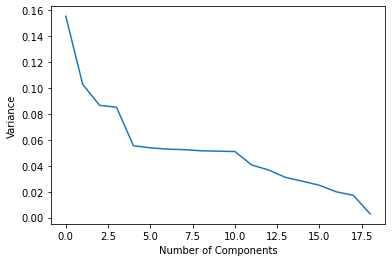

In [38]:
#Scree Plot

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.show()

In [39]:
# calculating eigenvalues
cov_matrix = np.dot(df_normalized.T, df_normalized) / df_normalized.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]
eigenvalues

[2.954116037638239,
 1.9545953503802693,
 1.6469503013382667,
 1.6187346879616717,
 1.0546637237894294,
 1.0226779034958957,
 1.0041890143686159,
 0.9964929156737053,
 0.9799350823063575,
 0.9742466474703342,
 0.9689441592066679,
 0.7708395544549753,
 0.6980460164141025,
 0.588497779422469,
 0.5336198197354307,
 0.4735834823360595,
 0.37738369131855165,
 0.32709445025430495,
 0.05348938243456372]

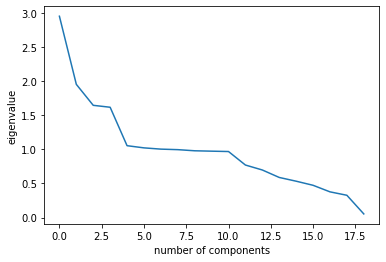

In [40]:
# plotting eigenvalues for better visuilization
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.show()

In [41]:
pca_keep = PCA(n_components  = 7)
pca_keep.fit(df_normalized)
med_df_pca_keep = pd.DataFrame(pca_keep.transform(df_normalized),
                        columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
med_df_pca_keep

#pca.fit(df_normalized)
#med_df_pca = pd.DataFrame(pca.transform(df_normalized),
 #                       columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19'])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.524939,-1.166754,0.199320,0.656077,0.278362,1.843089,-0.244113
1,-0.359259,-0.656473,-0.117377,0.544244,-0.321262,0.063672,0.888563
2,-0.195146,-1.338087,-0.770955,0.613221,-0.491880,-1.091173,0.436007
3,2.388895,-1.345939,0.285799,1.146551,-1.090628,-0.306787,-0.760595
4,-2.406334,-1.824507,-0.201134,-1.983718,0.775651,-0.295335,-1.463027
...,...,...,...,...,...,...,...
9995,-2.118181,0.039596,-0.102055,-1.515393,-0.240254,-0.389134,0.120867
9996,-0.658380,1.115536,1.442134,2.917362,0.552765,-1.396312,0.587167
9997,-1.901055,-0.002890,0.145132,0.296967,-0.891193,-0.121119,1.442672
9998,0.815428,1.071603,1.026946,-0.985485,-0.221513,-0.254289,0.701581


In [42]:
loadings = pd.DataFrame(pca_keep.components_.T,
            columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7' ],
            index=df.columns)
#Styling - Create heatmap
cm = sns.light_palette("navy", as_cmap=True)

s = loadings.style.background_gradient(cmap=cm, subset=pd.IndexSlice[:, ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']])
s

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Population,0.010208,0.019194,0.028198,-0.025745,0.500502,0.014859,-0.007241
Children,0.002475,0.002924,0.018549,0.012446,0.142652,-0.070167,0.893663
Age,0.000550,0.082613,-0.021061,0.700477,0.020343,-0.024033,-0.014329
Income,-0.002468,-0.005394,-0.018869,-0.006358,0.157481,0.614876,0.301028
VitD_levels,-0.009477,0.537726,0.051981,-0.051092,-0.291311,0.264998,-0.058667
Doc_visits,0.007133,-0.004202,-0.008099,0.012194,0.173861,0.629798,-0.159530
Full_meals_eaten,-0.000631,-0.010813,0.018207,0.037831,-0.556674,0.163133,0.239450
VitD_supp,-0.005116,0.032904,0.009352,0.011063,0.419849,0.152052,-0.123960
Initial_days,-0.020497,0.441809,0.068606,-0.070271,0.316469,-0.312038,0.079259
TotalCharge,-0.018499,0.697330,0.083170,-0.074885,-0.023460,0.003654,0.001668


List of principal components in the data set:
- Population
- Children
- Age
- Income
- VitD_level
- Doc_visits
- VitD_supp
- Initial_days
- Total charge
- Additional_charges
- Survey_timely_addmission
- Survey_timely_treatment
- Survey_options
- Survey_hours_of_treatments

These principal components are identified by picking out variables with a value above 0.4.
The result of PCA will bring benefit to the organization by narrowing down the important variables that have a higher impact on the readmission rate to the hospital. After reducing to 7 PCs, this could help to simplify future analysis.  


### Part IV: Supporting Documents

#### Video
https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=209088b1-c8b3-49cb-ad58-ae23002ac655 

#### Sources

Marini, J. (n.d.). Learning python online class: Linkedin learning, formerly Lynda.com. LinkedIn. Retrieved January 16, 2022, from https://www.linkedin.com/learning/learning-python-14393370?trk=learning-path&amp;upsellOrderOrigin=sem_src.go-pa_c.LLS-C_NAMER_US_T1_EN-US_SEM_SEM_GoogleAds_NA_All_NA_NA_Core_NA_Dev-Python-MKAG_Nonbrand_Exact_pkw.learning%2Bpython_pmt.e_pcrid.461817912679_pdv.c_plc._trgid.kwd-131493262_net.g_learning 

Sharma, A. (2020, January 1). Python PCA (Principal Component Analysis) with Sklearn. DataCamp Community. Retrieved January 16, 2022, from https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python 

VERMA, N. I. R. A. J. (2017, January 12). Principal Component Analysis explained. Kaggle. Retrieved January 16, 2022, from https://www.kaggle.com/nirajvermafcb/principal-component-analysis-explained 